In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
X,y = make_blobs(n_samples =1000, centers=3, n_features=2, random_state=23)

In [ ]:
X.shape

(1000, 2)

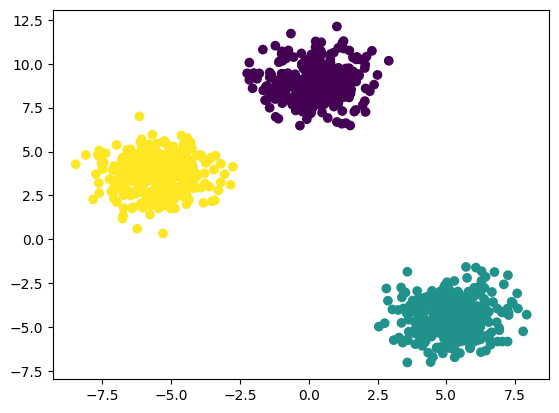

In [ ]:
plt.scatter(X[:,0],X[:,1],c = y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33,random_state=42)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Manual Process
# Elbow Method to select the K value
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters =k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1181.4952002962864,
 1005.1172225199145,
 855.0697773348372,
 768.0256846672461,
 685.6304115064462,
 630.2113248210092,
 534.5036736410859]

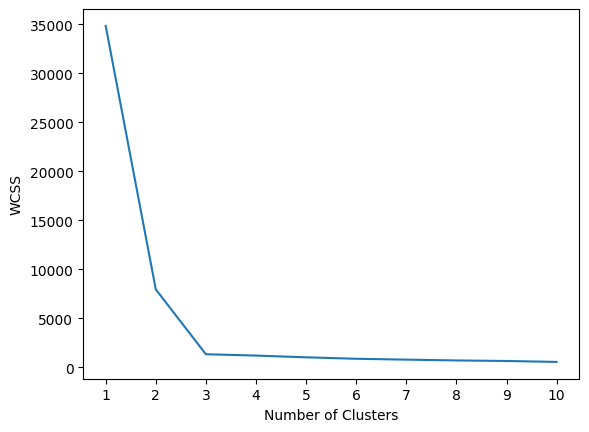

In [ ]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters =3,init='k-means++')

In [ ]:
y_test_labels = kmeans.predict(X_test)

In [ ]:
y_labels = kmeans.fit_predict(X_train)

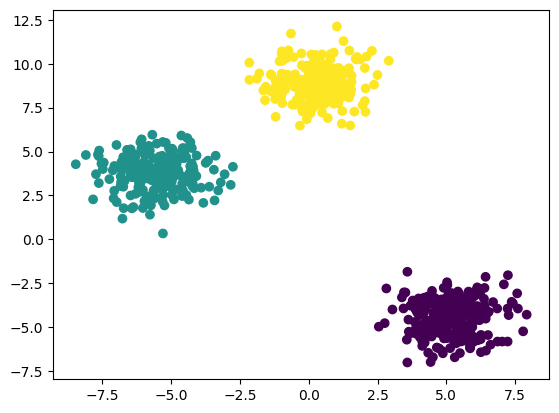

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

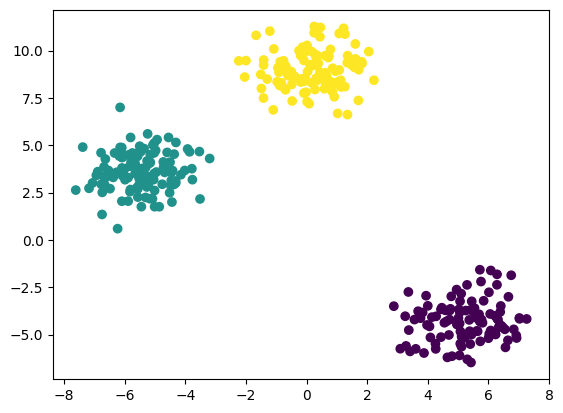

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [ ]:
## knee locator
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')

In [ ]:
kl.elbow

np.int64(3)

In [ ]:
## Performance metrics
## Silhoutte score
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters = k, init ='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6578773435536361),
 np.float64(0.4976411641991926),
 np.float64(0.5100127791772588),
 np.float64(0.319448957929779),
 np.float64(0.3391760409529749),
 np.float64(0.3406265002110743),
 np.float64(0.30599240220611973)]

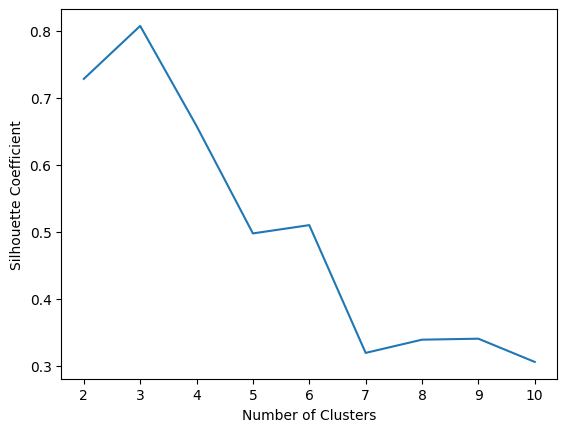

In [ ]:
## Plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()